# HDF-N master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
33f5ec7 (Wed Dec 6 16:56:17 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, 
                                              quick_checks, find_last_ml_suffix)

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:

OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_hdf-n_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_hdf-n_20171212.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

Table shows only problematic columns.


idx,Column,All nan,#Measurements,#Zeros,#Negative,Minimum value
0,f_acs_f435w,False,35423,216,2558,-30.47948
1,ferr_acs_f435w,False,35423,0,10,-1.76424786925e+13
2,f_acs_f606w,False,35423,64,1064,-33.79156
3,ferr_acs_f606w,False,35423,0,10,-8.51552626035e+12
4,f_acs_f775w,False,35423,32,780,-28.34217
5,ferr_acs_f775w,False,35423,0,10,-1.80057678171e+13
6,f_acs_f814w,False,35423,17,633,-1.06343
7,ferr_acs_f814w,False,35423,0,10,-1.37581361087e+13
8,f_acs_f850lp,False,35423,17,658,-53.63154
9,ferr_acs_f850lp,False,35423,0,10,-3.74663186416e+13


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

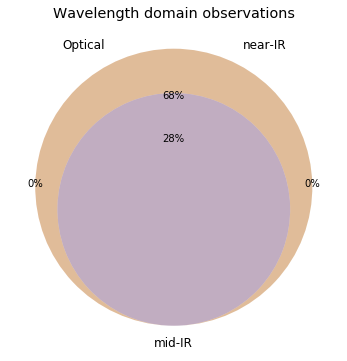

In [6]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


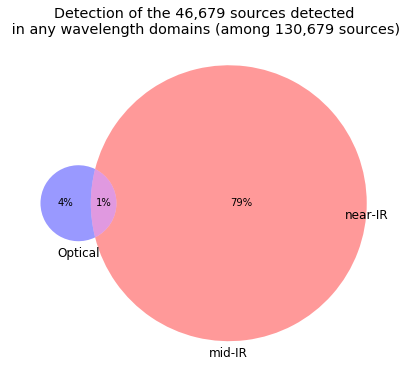

In [7]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = ["MOSAIC u"]
g_bands = ["GPC1 g"]
r_bands = ["GPC1 r", "SUPRIME r"]
i_bands = ["GPC1 i" ]
z_bands = ["GPC1 z", "SUPRIME z"]
y_bands = ["GPC1 y"]
j_bands = [                                               ]
h_bands = [                                               ]
k_bands = [                                               ]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

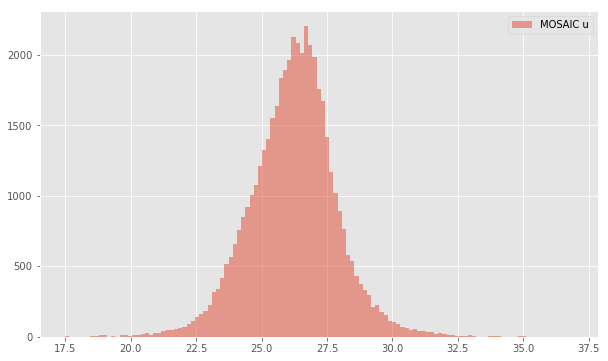

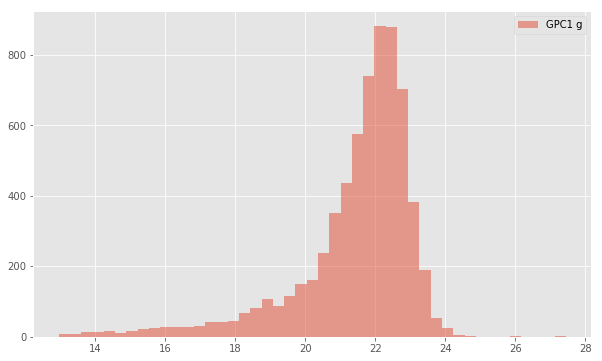

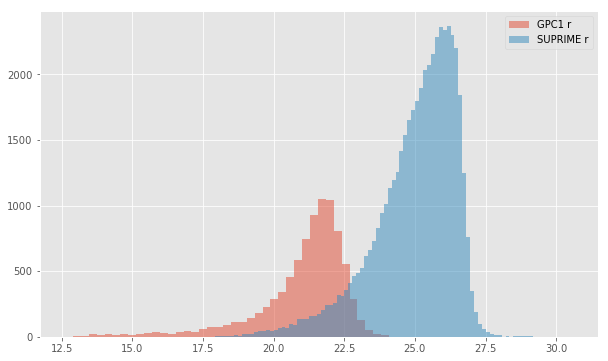

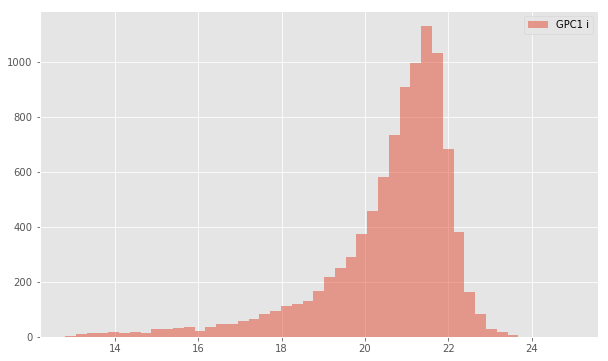

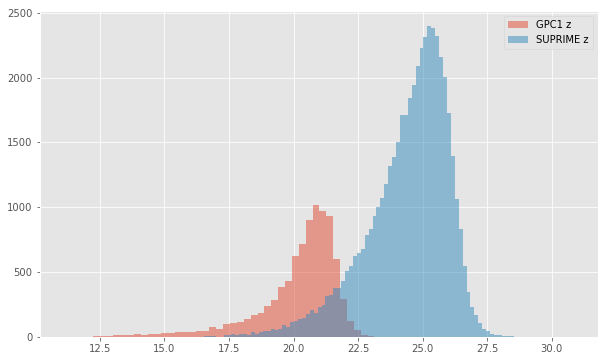

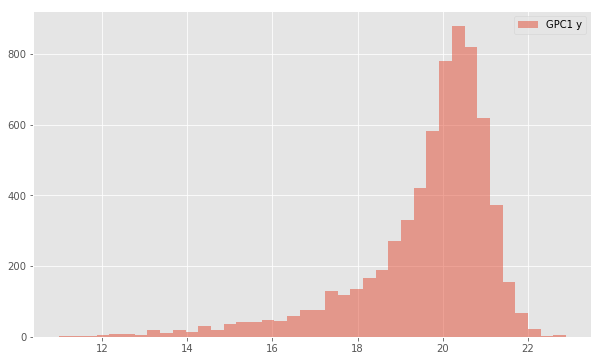

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

SUPRIME r (aperture) - GPC1 r (aperture):
- Median: 0.06
- Median Absolute Deviation: 0.20
- 1% percentile: -1.6301397091674799
- 99% percentile: 0.8812668980981484


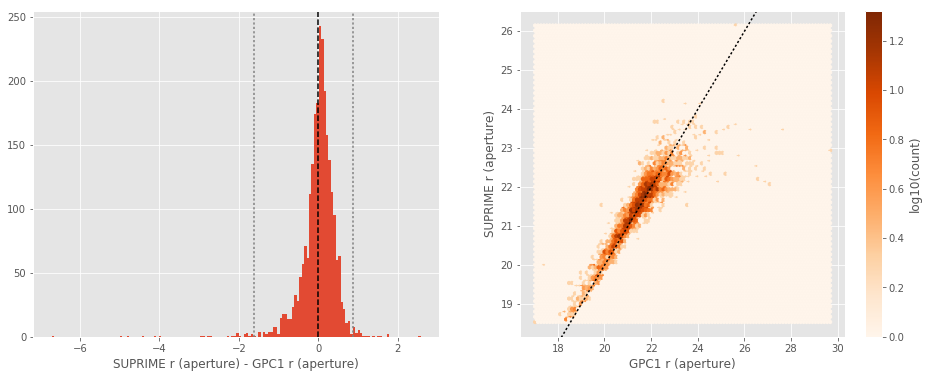

SUPRIME r (total) - GPC1 r (total):
- Median: -0.25
- Median Absolute Deviation: 0.15
- 1% percentile: -1.1232578693249518
- 99% percentile: 0.7493969664733899


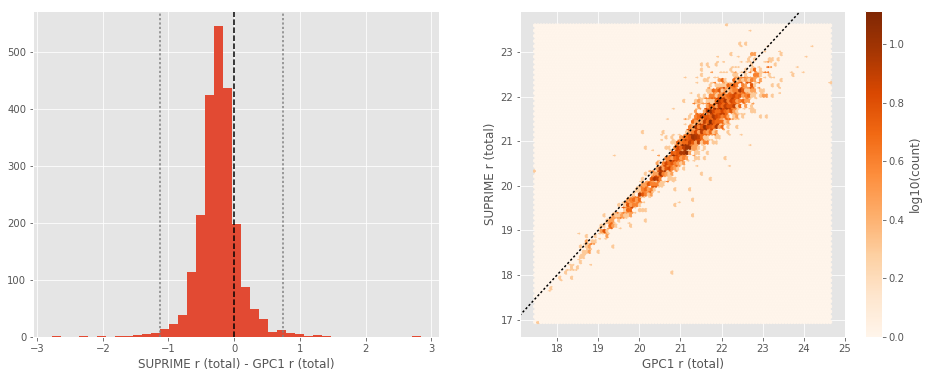

SUPRIME z (aperture) - GPC1 z (aperture):
- Median: 0.12
- Median Absolute Deviation: 0.17
- 1% percentile: -1.233089962700196
- 99% percentile: 0.929599423325196


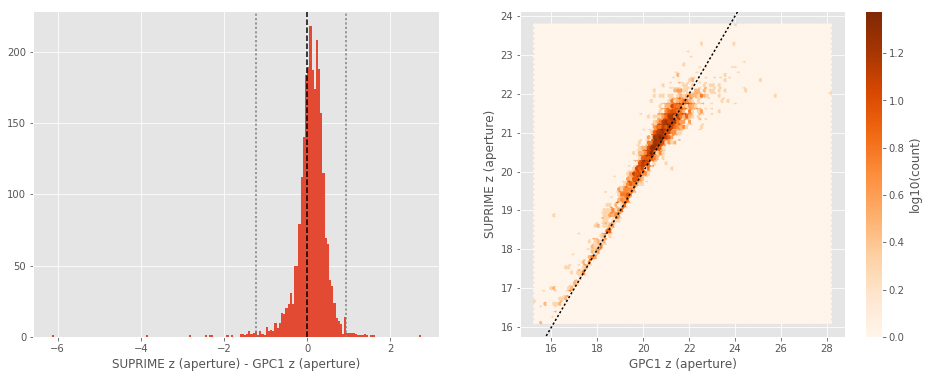

SUPRIME z (total) - GPC1 z (total):
- Median: -0.16
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9842615809265134
- 99% percentile: 0.6945952474963386


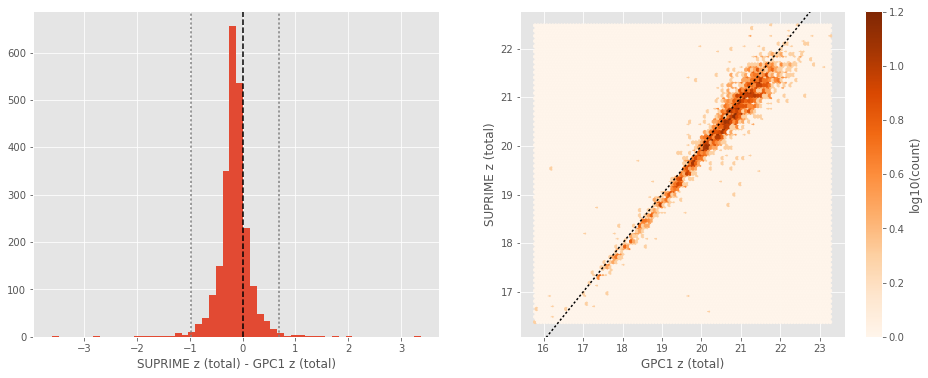

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands, j_bands, h_bands, k_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [12]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_HDF-N.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

MOSAIC u (aperture) - SDSS u (fiberMag):
- Median: -0.15
- Median Absolute Deviation: 0.44
- 1% percentile: -1.7168668045751936
- 99% percentile: 2.942735320161134


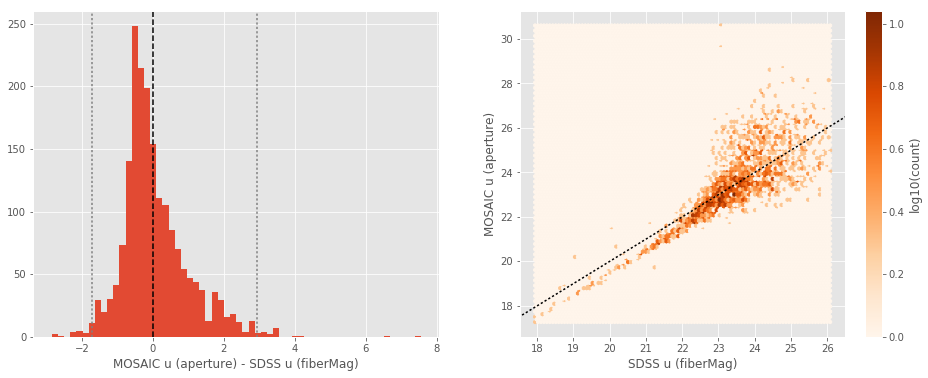

MOSAIC u (total) - SDSS u (petroMag):
- Median: 0.26
- Median Absolute Deviation: 0.67
- 1% percentile: -3.3910033163061515
- 99% percentile: 4.251866573155514


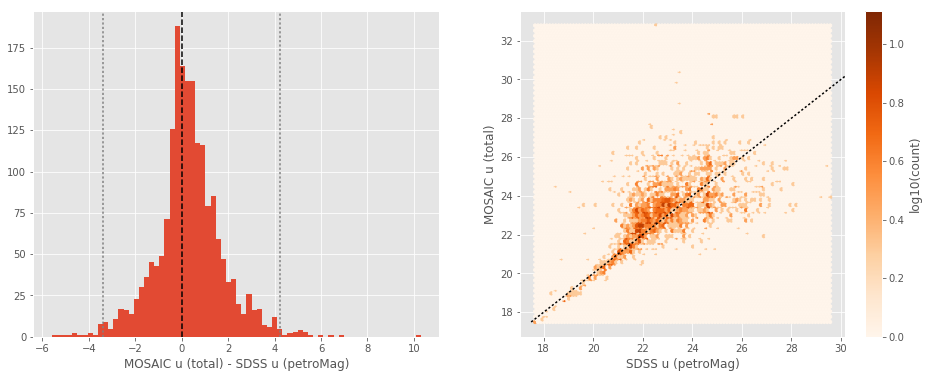

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.56
- Median Absolute Deviation: 0.26
- 1% percentile: -1.9212527465820313
- 99% percentile: 1.6793731307983402


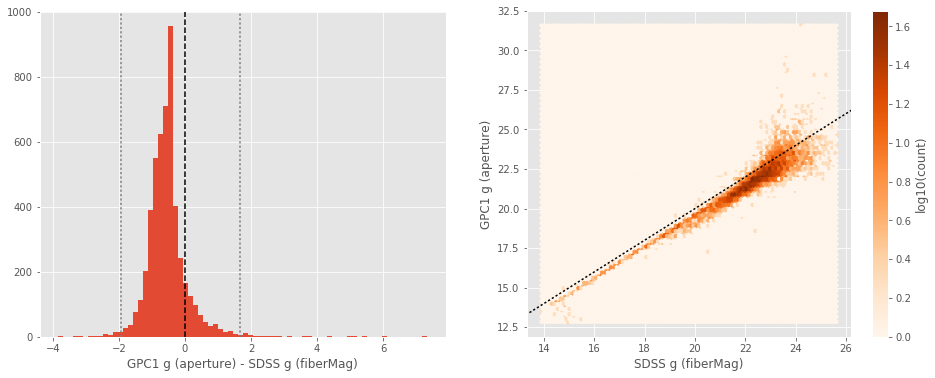

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.07
- Median Absolute Deviation: 0.18
- 1% percentile: -2.575319595336914
- 99% percentile: 0.9294250488281249


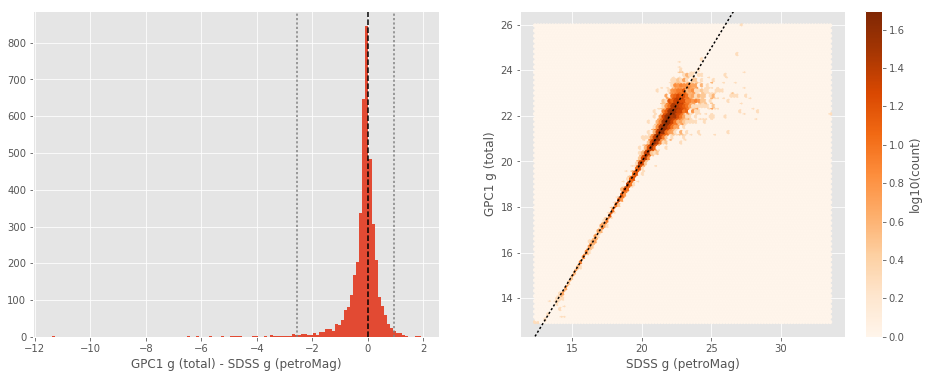

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.48
- Median Absolute Deviation: 0.16
- 1% percentile: -1.2868563842773437
- 99% percentile: 0.7482539176940916


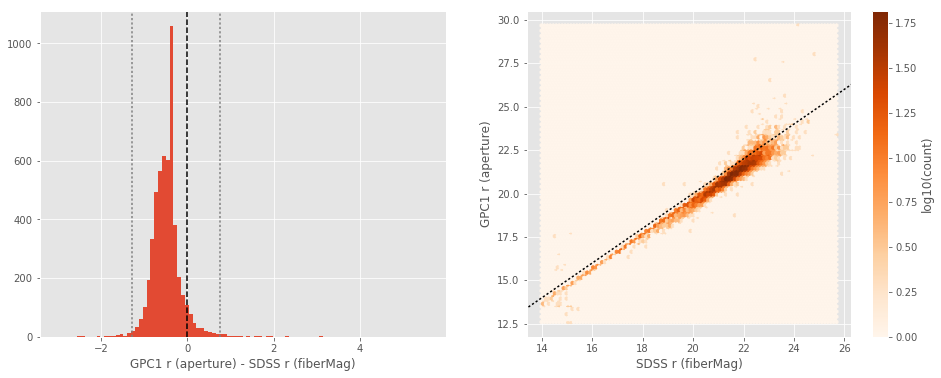

GPC1 r (total) - SDSS r (petroMag):
- Median: 0.03
- Median Absolute Deviation: 0.12
- 1% percentile: -1.315773811340332
- 99% percentile: 0.9560638809204104


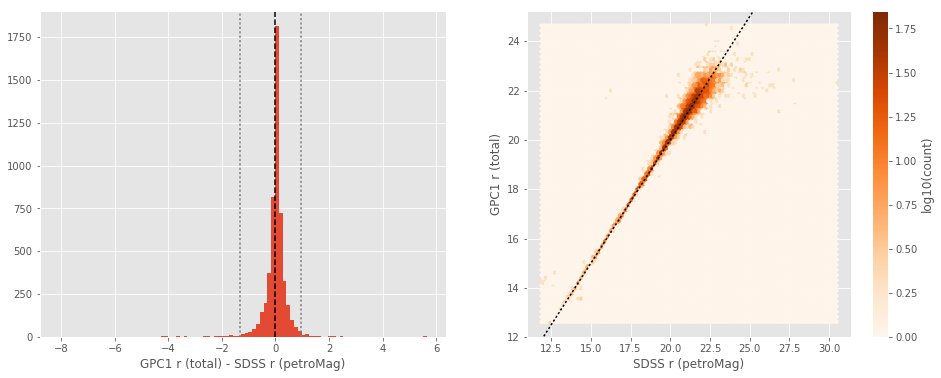

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.42
- Median Absolute Deviation: 0.11
- 1% percentile: -1.1524517989306626
- 99% percentile: 0.2232965563378855


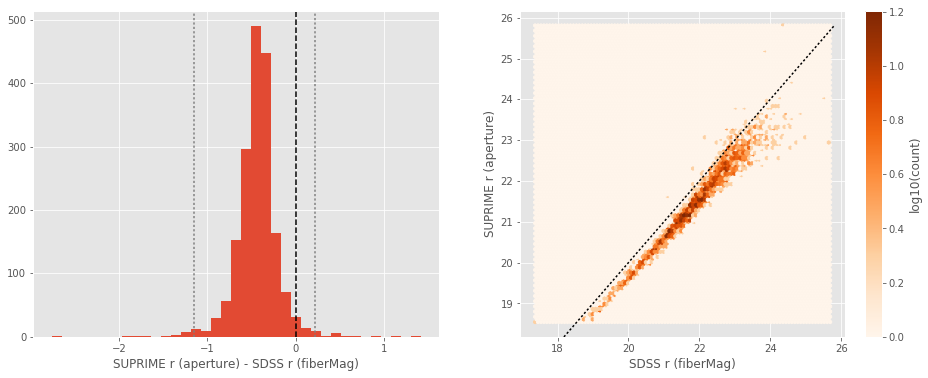

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.20
- Median Absolute Deviation: 0.19
- 1% percentile: -3.034374487626954
- 99% percentile: 1.0472558652038568


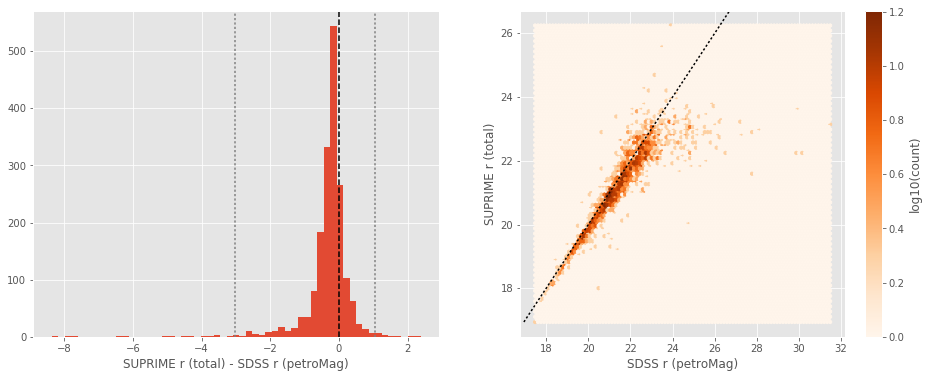

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.46
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0226084136962892
- 99% percentile: 0.2847875595092761


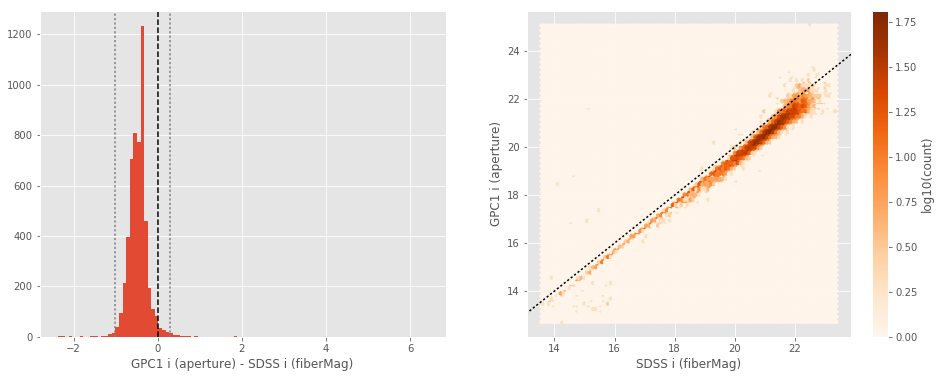

GPC1 i (total) - SDSS i (petroMag):
- Median: 0.05
- Median Absolute Deviation: 0.11
- 1% percentile: -1.9358815574645996
- 99% percentile: 0.9237280464172345


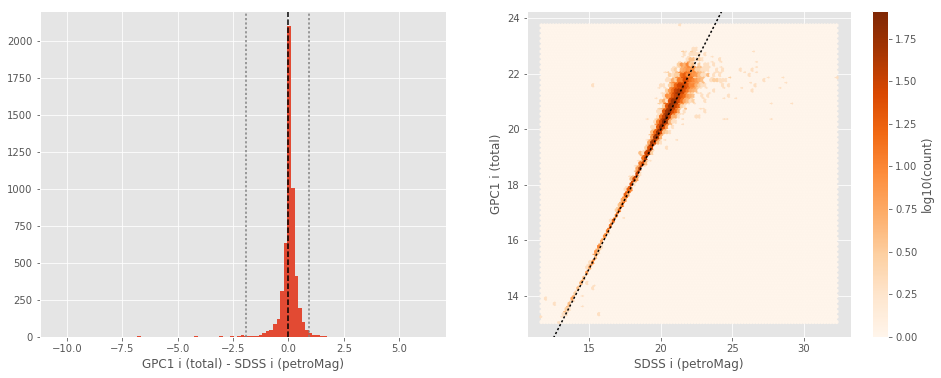

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.18
- 1% percentile: -1.4708376121520996
- 99% percentile: 0.8543142700195321


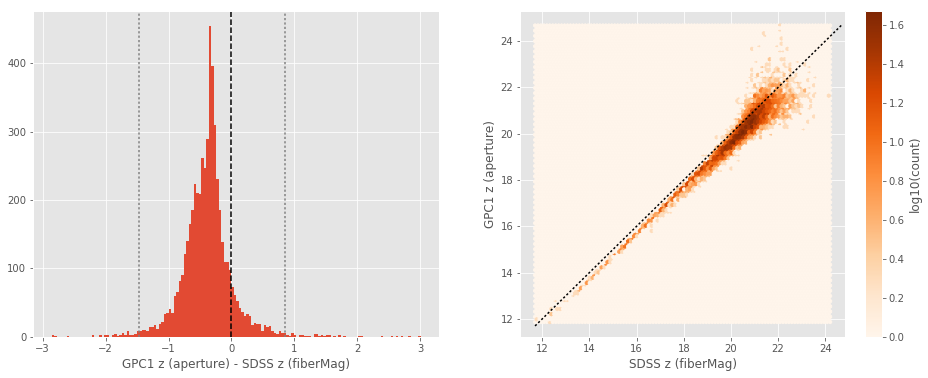

GPC1 z (total) - SDSS z (petroMag):
- Median: 0.09
- Median Absolute Deviation: 0.29
- 1% percentile: -4.030088806152344
- 99% percentile: 1.537776794433595


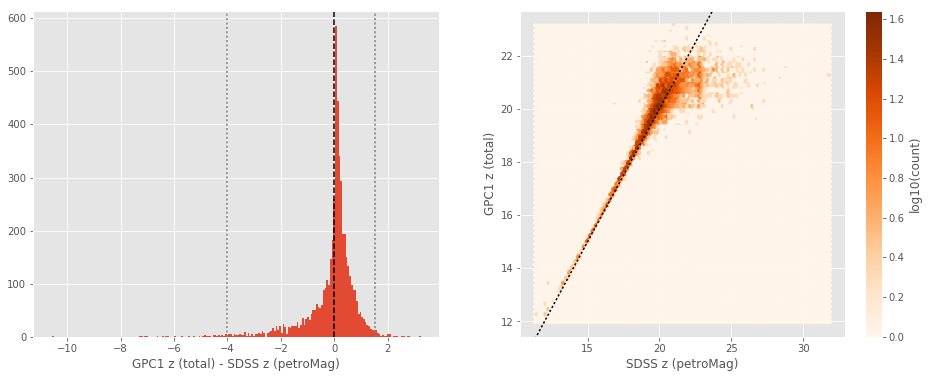

SUPRIME z (aperture) - SDSS z (fiberMag):
- Median: -0.23
- Median Absolute Deviation: 0.17
- 1% percentile: -1.2519832500915538
- 99% percentile: 1.0297534400939927


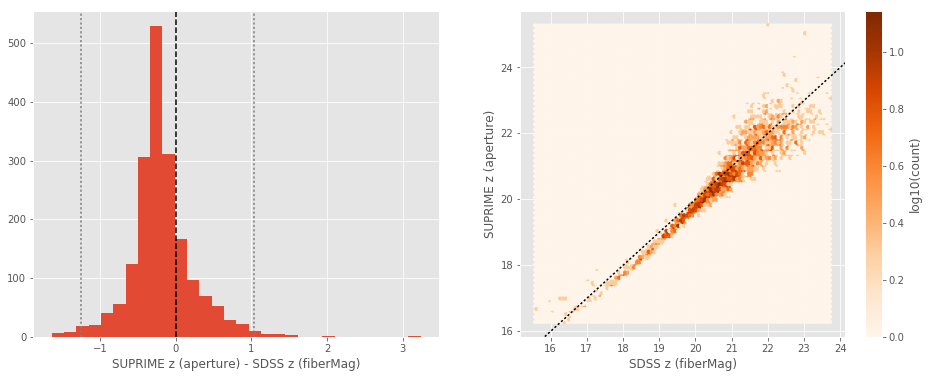

SUPRIME z (total) - SDSS z (petroMag):
- Median: -0.02
- Median Absolute Deviation: 0.43
- 1% percentile: -4.218913514050293
- 99% percentile: 2.0048278384594718


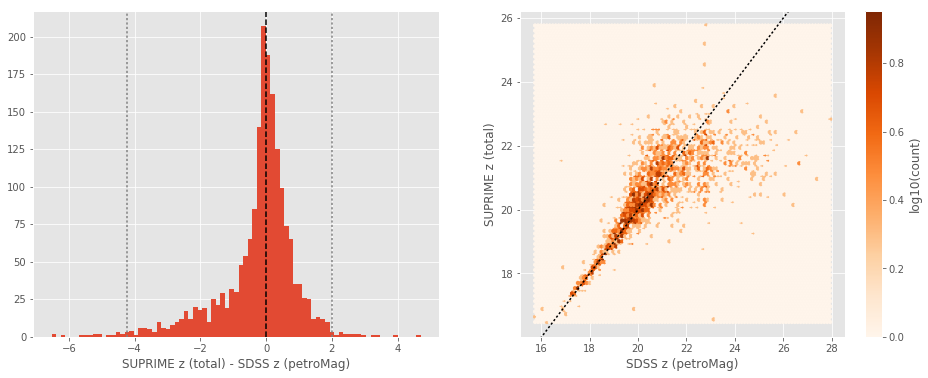

In [13]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [14]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [15]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_XMM-LSS.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

In [16]:
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, master_catalogue['m_wircam_k'][ml_twomass_idx],
                labels=("2MASS Ks", "WIRCAM Ks (total)"))

No sources have both 2MASS Ks and WIRCAM Ks (total) values.


## IV - Comparing aperture magnitudes to total ones.

Number of source used: 614 / 130679 (0.47%)
Number of source used: 12017 / 130679 (9.20%)


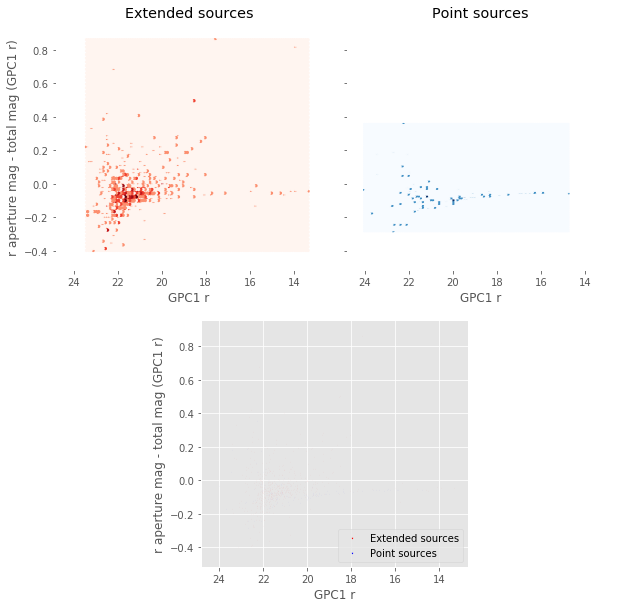

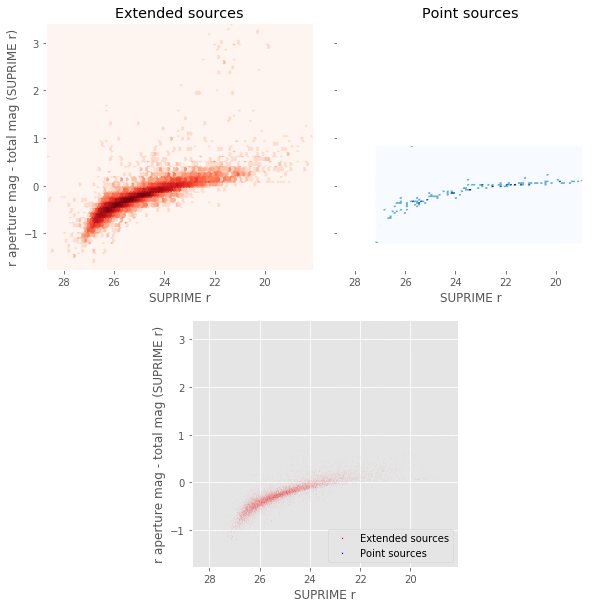

In [17]:
for band in r_bands:
    nb_ccplots(
        master_catalogue["m_{}".format(band.replace(" ", "_").lower())],
        master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())] - master_catalogue["m_{}".format(band.replace(" ", "_").lower())],
        band, "r aperture mag - total mag ({})".format(band),
        master_catalogue["stellarity"],
        invert_x=True
    )

## V - Color-color and magnitude-color plots

Number of source used: 308 / 130679 (0.24%)


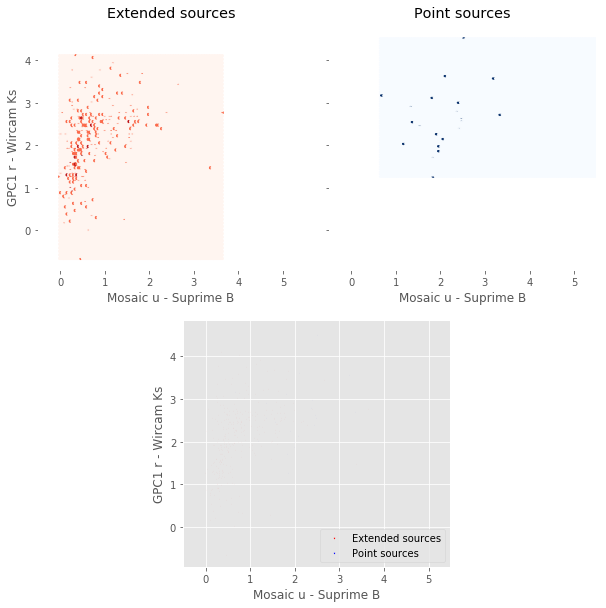

In [20]:
nb_ccplots(
    master_catalogue['m_mosaic_u'] - master_catalogue['m_suprime_b'],
    master_catalogue['m_gpc1_r'] - master_catalogue['m_wircam_k'],
    "Mosaic u - Suprime B", "GPC1 r - Wircam Ks",
    master_catalogue["stellarity"]
)

Number of source used: 401 / 130679 (0.31%)


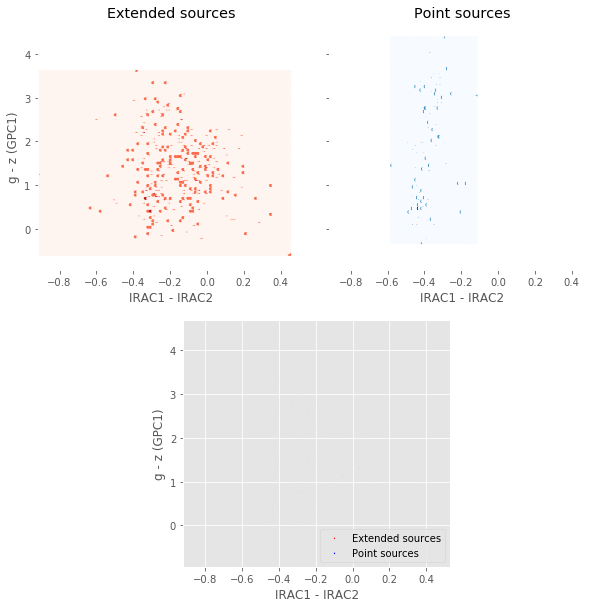

In [21]:
nb_ccplots(
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_z'],
    "IRAC1 - IRAC2", "g - z (GPC1)",
    master_catalogue["stellarity"]
)